In [1]:
%load_ext autoreload
%autoreload 2
from modules import read_and_write
from modules import polyakov
from modules import utility
from modules import fourier_surface
from modules import global_variables
import os
import glob

In [2]:
#folders = utility.list_all_folders(global_variables.data_path_surface_abs,"su4")
folders = utility.list_all_folders(global_variables.data_path_surface_z_smear,"su4")


../data/output-measure-surface-z-smear/su4-40-40-60-6/beta-10.8-twist-1 , index: 0
../data/output-measure-surface-z-smear/su4-40-40-60-6/beta-10.8-twist-2 , index: 1
../data/output-measure-surface-z-smear/su4-60-60-80-6/beta-10.797-twist-1 , index: 2
../data/output-measure-surface-z-smear/su4-60-60-80-6/beta-10.797-twist-2 , index: 3
../data/output-measure-surface-z-smear/su4-80-80-120-6/beta-10.8-twist-1-05-03-25 , index: 4
../data/output-measure-surface-z-smear/su4-80-80-120-6/beta-10.8-twist-1-06-03-25 , index: 5
../data/output-measure-surface-z-smear/su4-80-80-120-6/beta-10.8-twist-1-full , index: 6
../data/output-measure-surface-z-smear/su4-80-80-120-6/beta-10.8-twist-1-short , index: 7
../data/output-measure-surface-z-smear/su4-80-80-120-6/beta-10.8-twist-2-05-03-25 , index: 8
../data/output-measure-surface-z-smear/su4-80-80-120-6/beta-10.8-twist-2-06-03-25 , index: 9
../data/output-measure-surface-z-smear/su4-80-80-120-6/beta-10.8-twist-2-full , index: 10
../data/output-measure-

## Load data

In [ ]:

smooth_surfaces= {}
choose_folder = 2
folder = folders[choose_folder]
files = glob.glob(os.path.join(folder, "surface_smooth_*"))
print(files)
for file in files:
    file_name = file.split("/")[-1]
    smearing_level = file_name.split("_")[2] + "_" + file_name.split("_")[3]
    print(smearing_level)
    volume, surface = read_and_write.read_surface_data(folder, file_name)
    smooth_surfaces[smearing_level] = surface
#utility.display_markdown_title(folder)
#print(len(smooth_surfaces['40']))

['../data/output-measure-surface-z-smear/su4-60-60-80-6/beta-10.797-twist-1/surface_smooth_80_70', '../data/output-measure-surface-z-smear/su4-60-60-80-6/beta-10.797-twist-1/surface_smooth_80_80', '../data/output-measure-surface-z-smear/su4-60-60-80-6/beta-10.797-twist-1/surface_smooth_60_70', '../data/output-measure-surface-z-smear/su4-60-60-80-6/beta-10.797-twist-1/surface_smooth_70_80', '../data/output-measure-surface-z-smear/su4-60-60-80-6/beta-10.797-twist-1/surface_smooth_50_80', '../data/output-measure-surface-z-smear/su4-60-60-80-6/beta-10.797-twist-1/surface_smooth_70_70', '../data/output-measure-surface-z-smear/su4-60-60-80-6/beta-10.797-twist-1/surface_smooth_60_80', '../data/output-measure-surface-z-smear/su4-60-60-80-6/beta-10.797-twist-1/surface_smooth_50_70']
80
Constructing surface array
80
Constructing surface array
60
Constructing surface array
70
Constructing surface array
50
Constructing surface array
70
Constructing surface array
60
Constructing surface array
50
Co

dict_keys(['50'])


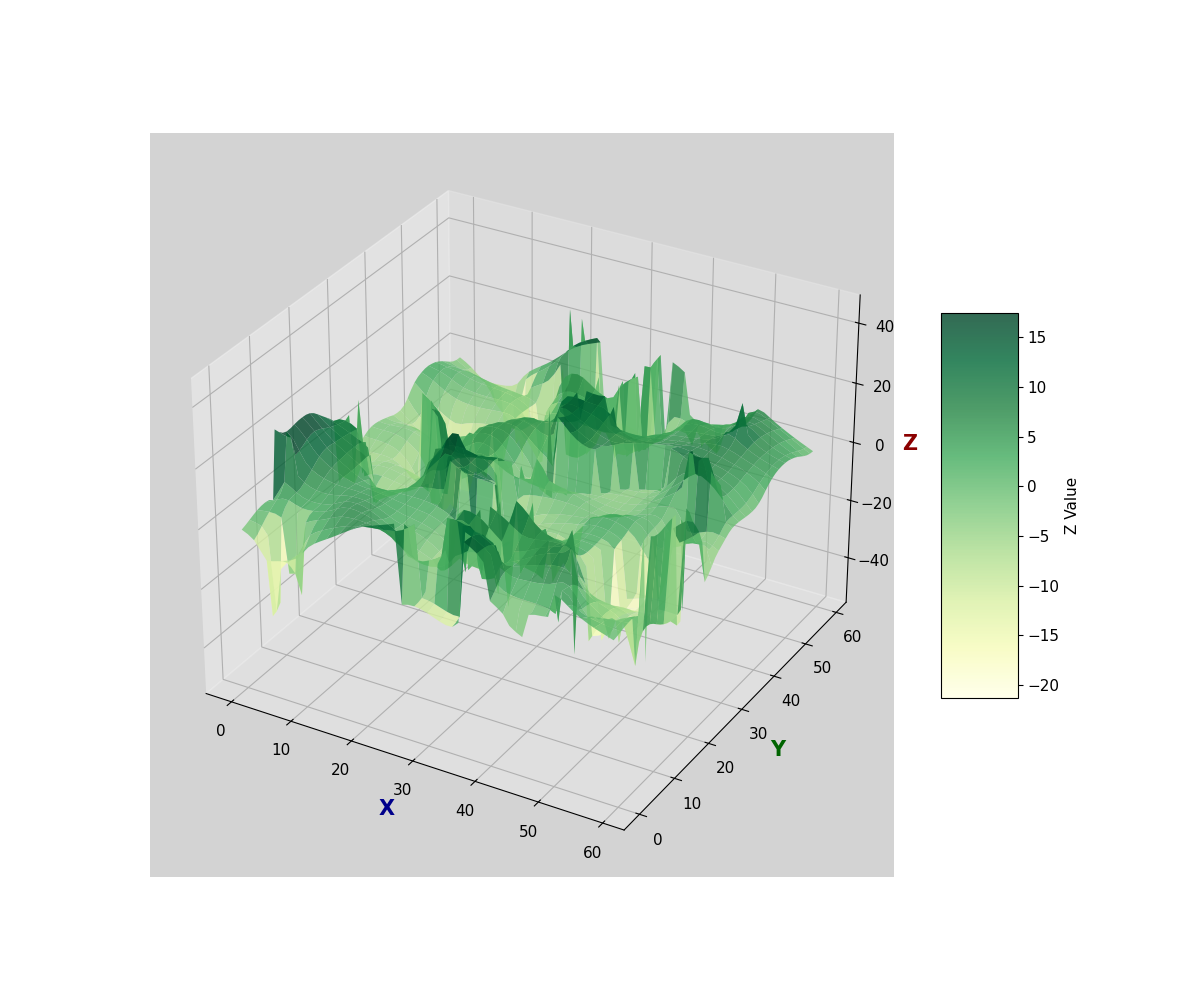

27.1743 -33.6722


In [7]:
%matplotlib widget
smearing_level = "50"
print(smooth_surfaces.keys())
index = 12900 # addded thermalization
fourier_surface.surface_in_3d(smooth_surfaces[smearing_level][index],artistic=False,extra=(smooth_surfaces[smearing_level][index-400],smooth_surfaces[smearing_level][index-800]))
print(smooth_surfaces[smearing_level][index][:,2].max(),smooth_surfaces[smearing_level][index][:,2].min())

In [35]:
import numpy as np
for smearing_level, surfaces in smooth_surfaces.items():
    print(surfaces)

[[[ 0.        0.        0.656276]
  [ 1.        0.        0.647669]
  [ 2.        0.        0.633097]
  ...
  [29.       31.        0.580285]
  [30.       31.        0.587859]
  [31.       31.        0.587003]]

 [[ 0.        0.        0.82434 ]
  [ 1.        0.        0.838165]
  [ 2.        0.        0.790821]
  ...
  [29.       31.        0.554627]
  [30.       31.        0.604288]
  [31.       31.        0.634357]]

 [[ 0.        0.        0.545348]
  [ 1.        0.        0.781369]
  [ 2.        0.        0.948672]
  ...
  [29.       31.        0.161565]
  [30.       31.        0.171989]
  [31.       31.        0.266653]]

 ...

 [[ 0.        0.       15.0737  ]
  [ 1.        0.       16.193   ]
  [ 2.        0.       17.2346  ]
  ...
  [29.       31.       13.5407  ]
  [30.       31.       13.5731  ]
  [31.       31.       13.9314  ]]

 [[ 0.        0.       15.3117  ]
  [ 1.        0.       15.5442  ]
  [ 2.        0.       15.8771  ]
  ...
  [29.       31.       15.3919  ]
  [3

CalledProcessError: Command '['ffmpeg', '-f', 'rawvideo', '-vcodec', 'rawvideo', '-s', '1000x800', '-pix_fmt', 'rgba', '-framerate', '10', '-loglevel', 'error', '-i', 'pipe:', '-vcodec', 'h264', '-pix_fmt', 'yuv420p', '-b', '1800k', '-metadata', 'artist=Me', '-y', '../videos/surfaces/su4-60-60-80-6-beta-10.797-twist-1/therm-15000-frame-100/smear-80.mp4']' returned non-zero exit status 255.

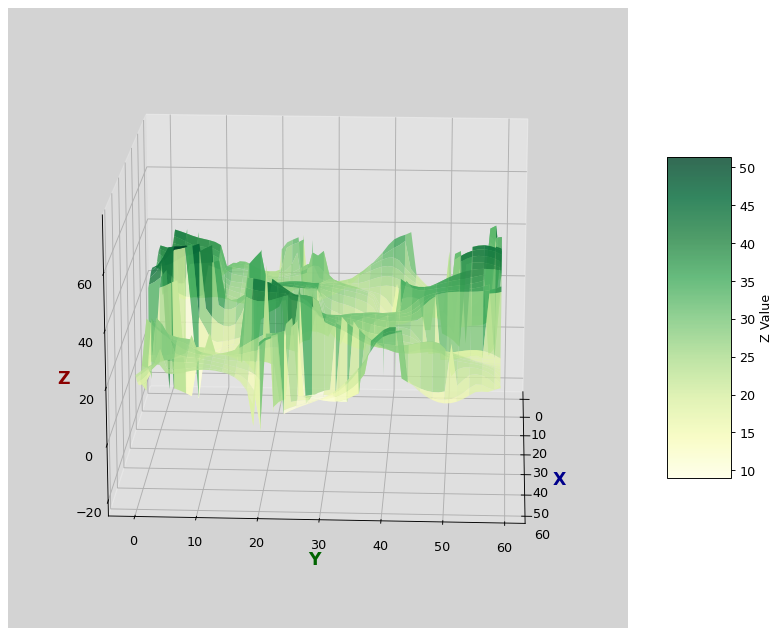

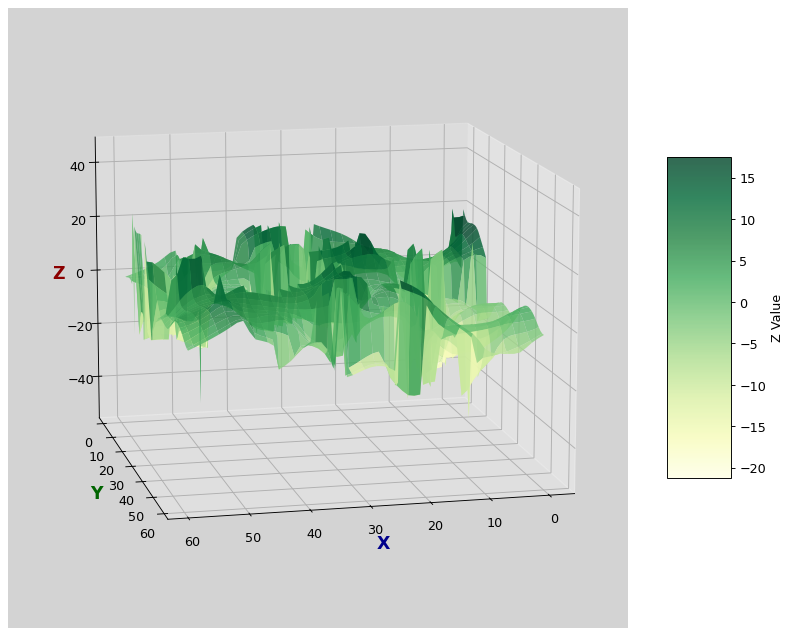

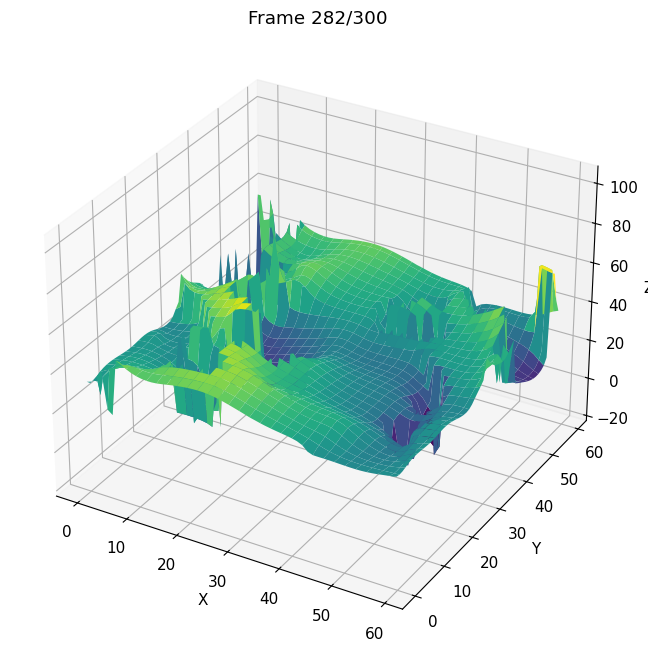

In [11]:
%matplotlib inline
name = "therm-15000-frame-100"
for smearing_level, surfaces in smooth_surfaces.items():
    number_of_frames = 300
    therm = 13800
    file_name = "-".join(folder.split("/")[-2:])
    os.makedirs(f"../videos/surfaces/{file_name}/{name}", exist_ok=True)
    fourier_surface.animate_surface_in_3d(surfaces[therm:number_of_frames+therm], volume, output_file=f"../videos/surfaces/{file_name}/{name}/smear-{smearing_level}.mp4", fps=10)
